In [1]:
import vaex
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir
from scipy.stats import norm
from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
# import utils
root_dir = abspath(pardir)
if root_dir not in sys.path:
    sys.path.append(root_dir)

from utils import style

In [3]:
style()

In [4]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [5]:
name = "GUMS"
data_dir = join(root_data_dir, name)
data_dir

'/home2/s20321005/Thesis-Project/Data/GUMS'

In [6]:
files = glob(join(data_dir, "gaia*.hdf5"))
files.sort()
files[:5]

['/home2/s20321005/Thesis-Project/Data/GUMS/gaia-000-010.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GUMS/gaia-010-020.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GUMS/gaia-020-030.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GUMS/gaia-030-040.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GUMS/gaia-040-050.hdf5']

In [9]:
gums_raw = vaex.open_many(files)
gums_raw = gums_raw.filter("barycentric_distance < 300")
gums_raw = gums_raw.extract()
gums_raw.head()

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type
0,1.66336,-80.8189,171.253,75.9241,45.559,-14.9521,14.4121,15.2173,13.4971,-0.0875959,0.063761,0.554,1,4.741,3917.42,K9V
1,1.66337,-80.8189,171.253,75.9241,45.559,-34.885,15.2047,16.0162,14.2877,-0.0875959,0.063761,0.39,1,4.925,3899.42,K9V
2,1.66337,-80.8189,171.253,75.9241,45.559,-23.1871,13.9851,14.7923,13.0694,-0.0875959,0.063761,0.944,1,nan,nan,
3,2.01606,-83.7599,288.982,-22.1455,-24.4575,72.6263,11.6772,12.01,11.1549,-0.623231,0.25762,0.932,2,4.253,6109.42,F8V
4,4.98783,-82.0722,299.839,31.3498,11.5762,-3.05592,13.6924,14.2552,12.9518,-0.104098,0.0314837,1.361,1,nan,nan,
5,5.00003,-82.0717,299.844,31.3469,11.5826,-3.07414,13.872,14.384,13.1787,-0.104098,0.0314837,0.806,1,4.594,4954.5,K1.5V
6,4.9701,-82.073,299.831,31.3541,11.5669,-3.02946,15.7345,16.6338,14.7632,-0.104098,0.0314837,0.555,1,4.75,3990.25,K8V
7,0.342864,-85.3733,212.729,65.5258,-11.6222,7.54122,14.2208,14.9119,13.384,-0.120538,0.0632029,0.626,1,4.685,4207.27,K7V
8,0.342877,-85.3733,212.729,65.5258,-11.6222,34.0377,15.3241,16.2807,14.3138,-0.120538,0.0632029,0.492,1,4.802,3828.25,K9V
9,0.34287,-85.3733,212.729,65.5258,-11.6222,19.2016,13.8853,14.641,12.9997,-0.120538,0.0632029,1.118,1,nan,nan,


In [10]:
# sample 5%
gums = gums_raw.sample(frac=0.02, random_state=69420)
gums = gums.extract()
gums.head()

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type
0,326.718,56.7665,217.849,-3.87834,-0.86863,-36.9056,16.4517,17.3925,15.4363,0.203177,-0.0119372,0.365,1,4.933,3655.95,M1V
1,129.612,-8.73027,201,-23.3409,46.2472,-18.9278,13.7324,14.4507,12.8779,-0.635972,0.192723,1.117,2,nan,nan,
2,74.5271,3.8645,273.878,-18.815,-43.0584,-16.6373,23.4397,23.755,22.9305,-0.0763494,-0.00132271,0.9,1,8.49,4623.81,DAVII
3,79.7334,14.8495,246.868,4.87979,-18.7855,22.4808,16.9661,17.9995,15.9198,-0.159224,0.0437705,0.365,1,4.933,3655.95,M1V
4,131.236,16.7676,286.793,-5.98057,-5.02178,-10.3855,26.776,30.9789,25.173,-0.069783,0.0268892,0.073,1,5.36,1599.56,L5V
5,6.78141,43.8661,42.0735,-104.906,-167.398,-7.49377,22.5947,26.7833,20.9909,-0.0420686,0.0106898,0.073,1,5.36,1599.56,L5V
6,232.992,85.3277,256.718,-34.5138,11.4107,-0.147807,18.1751,19.4767,16.9889,0.00383333,-0.00313651,0.226,1,5.052,3357.38,M2.5V
7,196.706,33.3167,139.302,8.01167,-64.7246,-34.6756,18.2833,19.8089,17.0208,-0.0602955,0.0627434,0.141,1,5.166,3140.51,M4.5V
8,156.392,-46.2071,258.937,-8.98803,4.46739,7.65062,8.25122,8.24105,8.26072,-0.00607375,0.0253834,2.434,1,4.25,10568.2,B9.5V
9,156.819,-5.93972,273.701,-45.5498,2.59652,54.6955,17.6078,18.7303,16.5068,-0.0367184,0.0158327,0.313,1,4.967,3451.44,M2.5V


In [11]:
# transform ra,dec to galactic coordinates
ra = gums['ra'].to_numpy()
dec = gums['dec'].to_numpy()

c = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
l, b = c.galactic.l.value, c.galactic.b.value
gums['l'] = l*np.pi/180
gums['b'] = b*np.pi/180
gums["ra"] = gums["ra"]*np.pi/180
gums["dec"] = gums["dec"]*np.pi/180
gums.head()

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b
0,5.7023,0.990762,217.849,-3.87834,-0.86863,-36.9056,16.4517,17.3925,15.4363,0.203177,-0.0119372,0.365,1,4.933,3655.95,M1V,1.7389,0.04346
1,2.26215,-0.152372,201,-23.3409,46.2472,-18.9278,13.7324,14.4507,12.8779,-0.635972,0.192723,1.117,2,nan,nan,,4.08205,0.332877
2,1.30074,0.0674483,273.878,-18.815,-43.0584,-16.6373,23.4397,23.755,22.9305,-0.0763494,-0.00132271,0.9,1,8.49,4623.81,DAVII,3.41197,-0.401374
3,1.39161,0.259172,246.868,4.87979,-18.7855,22.4808,16.9661,17.9995,15.9198,-0.159224,0.0437705,0.365,1,4.933,3655.95,M1V,3.29241,-0.222855
4,2.29051,0.292651,286.793,-5.98057,-5.02178,-10.3855,26.776,30.9789,25.173,-0.069783,0.0268892,0.073,1,5.36,1599.56,L5V,3.65797,0.566341
5,0.118358,0.765609,42.0735,-104.906,-167.398,-7.49377,22.5947,26.7833,20.9909,-0.0420686,0.0106898,0.073,1,5.36,1599.56,L5V,2.06485,-0.327898
6,4.06647,1.48925,256.718,-34.5138,11.4107,-0.147807,18.1751,19.4767,16.9889,0.00383333,-0.00313651,0.226,1,5.052,3357.38,M2.5V,2.0845,0.535063
7,3.43317,0.581486,139.302,8.01167,-64.7246,-34.6756,18.2833,19.8089,17.0208,-0.0602955,0.0627434,0.141,1,5.166,3140.51,M4.5V,1.66922,1.44822
8,2.72956,-0.806465,258.937,-8.98803,4.46739,7.65062,8.25122,8.24105,8.26072,-0.00607375,0.0253834,2.434,1,4.25,10568.2,B9.5V,4.85687,0.166944
9,2.73701,-0.103668,273.701,-45.5498,2.59652,54.6955,17.6078,18.7303,16.5068,-0.0367184,0.0158327,0.313,1,4.967,3451.44,M2.5V,4.38131,0.732324


In [12]:
gums['z'] = gums.evaluate('barycentric_distance * sin(b)')
gums['r'] = gums.evaluate('barycentric_distance * cos(b)')
gums.head()

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r
0,5.7023,0.990762,217.849,-3.87834,-0.86863,-36.9056,16.4517,17.3925,15.4363,0.203177,-0.0119372,0.365,1,4.933,3655.95,M1V,1.7389,0.04346,9.46474,217.643
1,2.26215,-0.152372,201,-23.3409,46.2472,-18.9278,13.7324,14.4507,12.8779,-0.635972,0.192723,1.117,2,nan,nan,,4.08205,0.332877,65.6794,189.966
2,1.30074,0.0674483,273.878,-18.815,-43.0584,-16.6373,23.4397,23.755,22.9305,-0.0763494,-0.00132271,0.9,1,8.49,4623.81,DAVII,3.41197,-0.401374,-107,252.112
3,1.39161,0.259172,246.868,4.87979,-18.7855,22.4808,16.9661,17.9995,15.9198,-0.159224,0.0437705,0.365,1,4.933,3655.95,M1V,3.29241,-0.222855,-54.5614,240.763
4,2.29051,0.292651,286.793,-5.98057,-5.02178,-10.3855,26.776,30.9789,25.173,-0.069783,0.0268892,0.073,1,5.36,1599.56,L5V,3.65797,0.566341,153.878,242.016
5,0.118358,0.765609,42.0735,-104.906,-167.398,-7.49377,22.5947,26.7833,20.9909,-0.0420686,0.0106898,0.073,1,5.36,1599.56,L5V,2.06485,-0.327898,-13.5499,39.8319
6,4.06647,1.48925,256.718,-34.5138,11.4107,-0.147807,18.1751,19.4767,16.9889,0.00383333,-0.00313651,0.226,1,5.052,3357.38,M2.5V,2.0845,0.535063,130.9,220.838
7,3.43317,0.581486,139.302,8.01167,-64.7246,-34.6756,18.2833,19.8089,17.0208,-0.0602955,0.0627434,0.141,1,5.166,3140.51,M4.5V,1.66922,1.44822,138.257,17.0324
8,2.72956,-0.806465,258.937,-8.98803,4.46739,7.65062,8.25122,8.24105,8.26072,-0.00607375,0.0253834,2.434,1,4.25,10568.2,B9.5V,4.85687,0.166944,43.0275,255.337
9,2.73701,-0.103668,273.701,-45.5498,2.59652,54.6955,17.6078,18.7303,16.5068,-0.0367184,0.0158327,0.313,1,4.967,3451.44,M2.5V,4.38131,0.732324,182.997,203.531


In [13]:
# gums = gums_raw.filter("abs(z) < 200").filter("r < 150")
# gums = gums.extract()
gums["M_G"] = gums["mag_g"] - 5 * np.log10(gums["barycentric_distance"]) + 5
gums.head()

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G
0,5.7023,0.990762,217.849,-3.87834,-0.86863,-36.9056,16.4517,17.3925,15.4363,0.203177,-0.0119372,0.365,1,4.933,3655.95,M1V,1.7389,0.04346,9.46474,217.643,9.76095
1,2.26215,-0.152372,201,-23.3409,46.2472,-18.9278,13.7324,14.4507,12.8779,-0.635972,0.192723,1.117,2,nan,nan,,4.08205,0.332877,65.6794,189.966,7.21645
2,1.30074,0.0674483,273.878,-18.815,-43.0584,-16.6373,23.4397,23.755,22.9305,-0.0763494,-0.00132271,0.9,1,8.49,4623.81,DAVII,3.41197,-0.401374,-107,252.112,16.252
3,1.39161,0.259172,246.868,4.87979,-18.7855,22.4808,16.9661,17.9995,15.9198,-0.159224,0.0437705,0.365,1,4.933,3655.95,M1V,3.29241,-0.222855,-54.5614,240.763,10.0038
4,2.29051,0.292651,286.793,-5.98057,-5.02178,-10.3855,26.776,30.9789,25.173,-0.069783,0.0268892,0.073,1,5.36,1599.56,L5V,3.65797,0.566341,153.878,242.016,19.4882
5,0.118358,0.765609,42.0735,-104.906,-167.398,-7.49377,22.5947,26.7833,20.9909,-0.0420686,0.0106898,0.073,1,5.36,1599.56,L5V,2.06485,-0.327898,-13.5499,39.8319,19.4747
6,4.06647,1.48925,256.718,-34.5138,11.4107,-0.147807,18.1751,19.4767,16.9889,0.00383333,-0.00313651,0.226,1,5.052,3357.38,M2.5V,2.0845,0.535063,130.9,220.838,11.1278
7,3.43317,0.581486,139.302,8.01167,-64.7246,-34.6756,18.2833,19.8089,17.0208,-0.0602955,0.0627434,0.141,1,5.166,3140.51,M4.5V,1.66922,1.44822,138.257,17.0324,12.5635
8,2.72956,-0.806465,258.937,-8.98803,4.46739,7.65062,8.25122,8.24105,8.26072,-0.00607375,0.0253834,2.434,1,4.25,10568.2,B9.5V,4.85687,0.166944,43.0275,255.337,1.18526
9,2.73701,-0.103668,273.701,-45.5498,2.59652,54.6955,17.6078,18.7303,16.5068,-0.0367184,0.0158327,0.313,1,4.967,3451.44,M2.5V,4.38131,0.732324,182.997,203.531,10.4214


In [14]:
# transform proper motion to Galactic coordinates; https://arxiv.org/pdf/1306.2945.pdf
delta_G = 27.12825*np.pi/180
alpha_G = 192.8594813*np.pi/180
l_ngp = 122.93192*np.pi/180 

C1 = np.sin(delta_G)*np.cos(gums.dec) - np.cos(delta_G)*np.sin(gums.dec)*np.cos(gums.ra - alpha_G)
C2 = np.cos(delta_G)*np.sin(gums.ra - alpha_G)
cosb = np.sqrt(C1**2 + C2**2)

gums["pmlon"] = 1/cosb*(C1*gums.pmra+C2*gums.pmdec)
gums["pmlat"] = 1/cosb*(-1*C2*gums.pmra+C1*gums.pmdec)
gums.head()

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat
0,5.7023,0.990762,217.849,-3.87834,-0.86863,-36.9056,16.4517,17.3925,15.4363,0.203177,-0.0119372,0.365,1,4.933,3655.95,M1V,1.7389,0.04346,9.46474,217.643,9.76095,-3.5304,1.82546
1,2.26215,-0.152372,201,-23.3409,46.2472,-18.9278,13.7324,14.4507,12.8779,-0.635972,0.192723,1.117,2,nan,nan,,4.08205,0.332877,65.6794,189.966,7.21645,-51.521,5.4028
2,1.30074,0.0674483,273.878,-18.815,-43.0584,-16.6373,23.4397,23.755,22.9305,-0.0763494,-0.00132271,0.9,1,8.49,4623.81,DAVII,3.41197,-0.401374,-107,252.112,16.252,26.7624,-38.6239
3,1.39161,0.259172,246.868,4.87979,-18.7855,22.4808,16.9661,17.9995,15.9198,-0.159224,0.0437705,0.365,1,4.933,3655.95,M1V,3.29241,-0.222855,-54.5614,240.763,10.0038,18.4188,-6.12003
4,2.29051,0.292651,286.793,-5.98057,-5.02178,-10.3855,26.776,30.9789,25.173,-0.069783,0.0268892,0.073,1,5.36,1599.56,L5V,3.65797,0.566341,153.878,242.016,19.4882,2.43045,-7.42148
5,0.118358,0.765609,42.0735,-104.906,-167.398,-7.49377,22.5947,26.7833,20.9909,-0.0420686,0.0106898,0.073,1,5.36,1599.56,L5V,2.06485,-0.327898,-13.5499,39.8319,19.4747,-121.047,-156.125
6,4.06647,1.48925,256.718,-34.5138,11.4107,-0.147807,18.1751,19.4767,16.9889,0.00383333,-0.00313651,0.226,1,5.052,3357.38,M2.5V,2.0845,0.535063,130.9,220.838,11.1278,33.3288,14.5122
7,3.43317,0.581486,139.302,8.01167,-64.7246,-34.6756,18.2833,19.8089,17.0208,-0.0602955,0.0627434,0.141,1,5.166,3140.51,M4.5V,1.66922,1.44822,138.257,17.0324,12.5635,-38.5997,52.5692
8,2.72956,-0.806465,258.937,-8.98803,4.46739,7.65062,8.25122,8.24105,8.26072,-0.00607375,0.0253834,2.434,1,4.25,10568.2,B9.5V,4.85687,0.166944,43.0275,255.337,1.18526,-9.98183,-1.0513
9,2.73701,-0.103668,273.701,-45.5498,2.59652,54.6955,17.6078,18.7303,16.5068,-0.0367184,0.0158327,0.313,1,4.967,3451.44,M2.5V,4.38131,0.732324,182.997,203.531,10.4214,-34.1708,-30.2305


In [16]:
# calculate vertical velocities and their errors
gums['vb'] = 4.74*gums["pmlat"]*gums["barycentric_distance"]/1000
gums["vphi"] = 4.74*gums["pmlon"]*gums["barycentric_distance"]/1000

gums["w"] = gums["vb"]*np.cos(gums.b) + gums["radial_velocity"]*np.sin(gums.b)
gums["v_xy"] = gums["radial_velocity"]*np.cos(gums.b) - gums["vb"]*np.sin(gums.b)
gums["v"] = gums["vphi"]*np.sin(gums.l) + gums["v_xy"]*np.cos(gums.l)
gums["u"] = gums["vphi"]*np.cos(gums.l) - gums["v_xy"]*np.sin(gums.l)
gums.head()

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u
0,5.7023,0.990762,217.849,-3.87834,-0.86863,-36.9056,16.4517,17.3925,15.4363,0.203177,-0.0119372,0.365,1,4.933,3655.95,M1V,1.7389,0.04346,9.46474,217.643,9.76095,-3.5304,1.82546,1.88498,-3.64551,0.279787,-36.9526,2.5886,37.0417
1,2.26215,-0.152372,201,-23.3409,46.2472,-18.9278,13.7324,14.4507,12.8779,-0.635972,0.192723,1.117,2,nan,nan,,4.08205,0.332877,65.6794,189.966,7.21645,-51.521,5.4028,5.14747,-49.0861,-1.31998,-19.5707,51.1885,13.1225
2,1.30074,0.0674483,273.878,-18.815,-43.0584,-16.6373,23.4397,23.755,22.9305,-0.0763494,-0.00132271,0.9,1,8.49,4623.81,DAVII,3.41197,-0.401374,-107,252.112,16.252,26.7624,-38.6239,-50.1408,34.7425,-39.656,-34.9043,24.3566,-42.803
3,1.39161,0.259172,246.868,4.87979,-18.7855,22.4808,16.9661,17.9995,15.9198,-0.159224,0.0437705,0.365,1,4.933,3655.95,M1V,3.29241,-0.222855,-54.5614,240.763,10.0038,18.4188,-6.12003,-7.16138,21.5528,-11.9529,20.3421,-23.3493,-18.2519
4,2.29051,0.292651,286.793,-5.98057,-5.02178,-10.3855,26.776,30.9789,25.173,-0.069783,0.0268892,0.073,1,5.36,1599.56,L5V,3.65797,0.566341,153.878,242.016,19.4882,2.43045,-7.42148,-10.0887,3.30395,-14.0859,-3.3509,1.28274,-4.5276
5,0.118358,0.765609,42.0735,-104.906,-167.398,-7.49377,22.5947,26.7833,20.9909,-0.0420686,0.0106898,0.073,1,5.36,1599.56,L5V,2.06485,-0.327898,-13.5499,39.8319,19.4747,-121.047,-156.125,-31.1357,-24.1402,-27.0634,-17.1219,-13.1344,26.5216
6,4.06647,1.48925,256.718,-34.5138,11.4107,-0.147807,18.1751,19.4767,16.9889,0.00383333,-0.00313651,0.226,1,5.052,3357.38,M2.5V,2.0845,0.535063,130.9,220.838,11.1278,33.3288,14.5122,17.659,40.5559,15.1156,-9.13141,39.8087,-11.9764
7,3.43317,0.581486,139.302,8.01167,-64.7246,-34.6756,18.2833,19.8089,17.0208,-0.0602955,0.0627434,0.141,1,5.166,3140.51,M4.5V,1.66922,1.44822,138.257,17.0324,12.5635,-38.5997,52.5692,34.7111,-25.4872,-30.1713,-38.6904,-21.5619,41.0077
8,2.72956,-0.806465,258.937,-8.98803,4.46739,7.65062,8.25122,8.24105,8.26072,-0.00607375,0.0253834,2.434,1,4.25,10568.2,B9.5V,4.85687,0.166944,43.0275,255.337,1.18526,-9.98183,-1.0513,-1.29032,-12.2513,-0.00108026,7.75867,13.2407,5.91388
9,2.73701,-0.103668,273.701,-45.5498,2.59652,54.6955,17.6078,18.7303,16.5068,-0.0367184,0.0158327,0.313,1,4.967,3451.44,M2.5V,4.38131,0.732324,182.997,203.531,10.4214,-34.1708,-30.2305,-39.2194,-44.3314,7.40493,66.8949,20.1789,77.6724


In [17]:
gums["u_LSR"] = gums["u"]# - 11.1
gums["v_LSR"] = gums["v"]# - 12.4
gums["w_LSR"] = gums["w"] + 7.25

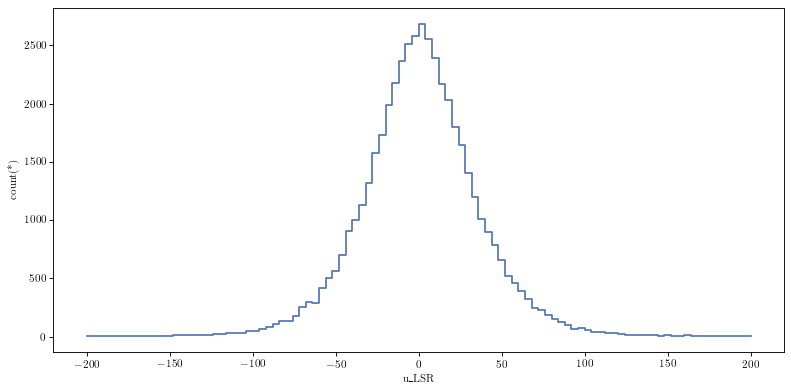

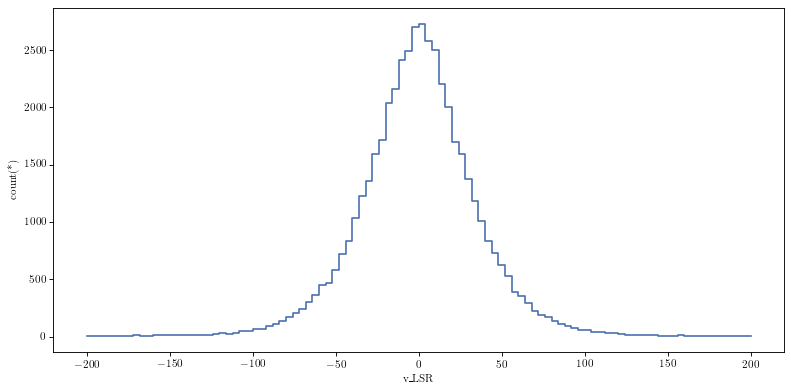

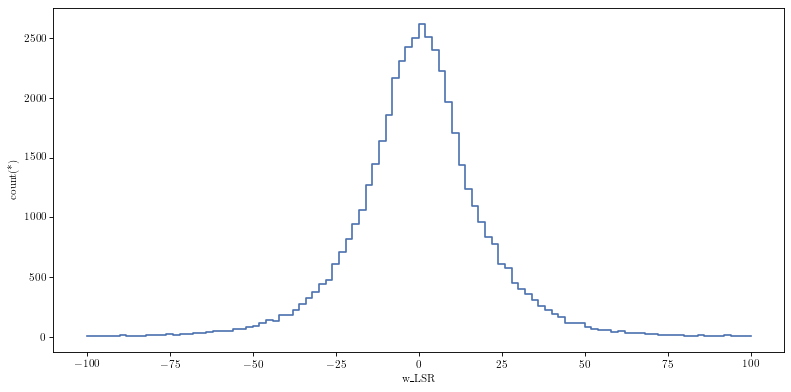

In [20]:
gums.viz.histogram("u_LSR", shape=100, limits=[-200, 200], figsize=(10, 5))
gums.viz.histogram("v_LSR", shape=100, limits=[-200, 200], figsize=(10, 5))
gums.viz.histogram("w_LSR", shape=100, limits=[-100, 100], figsize=(10, 5))

In [18]:
from scipy.stats import norm

gums["f_D"] = (norm.pdf(gums["u_LSR"].to_numpy(), loc=0, scale=35)*
                norm.pdf(gums["v_LSR"].to_numpy(), loc=-15, scale=20)*
                norm.pdf(gums["w_LSR"].to_numpy(), loc=0, scale=16))

In [19]:
gums["f_TD"] = (norm.pdf(gums["u_LSR"].to_numpy(), loc=0, scale=67)*
                norm.pdf(gums["v_LSR"].to_numpy(), loc=-46, scale=38)*
                norm.pdf(gums["w_LSR"].to_numpy(), loc=0, scale=35))

In [20]:
gums["f_H"] = (norm.pdf(gums["u_LSR"].to_numpy(), loc=0, scale=160)*
                norm.pdf(gums["v_LSR"].to_numpy(), loc=-220, scale=90)*
                norm.pdf(gums["w_LSR"].to_numpy(), loc=0, scale=90))

In [21]:
gums.head()

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H
0,5.7023,0.990762,217.849,-3.87834,-0.86863,-36.9056,16.4517,17.3925,15.4363,0.203177,-0.0119372,0.365,1,4.933,3655.95,M1V,1.7389,0.04346,9.46474,217.643,9.76095,-3.5304,1.82546,1.88498,-3.64551,0.279787,-36.9526,2.5886,37.0417,37.0417,2.5886,7.52979,1.96906e-06,2.63851e-07,2.23219e-09
1,2.26215,-0.152372,201,-23.3409,46.2472,-18.9278,13.7324,14.4507,12.8779,-0.635972,0.192723,1.117,2,nan,nan,,4.08205,0.332877,65.6794,189.966,7.21645,-51.521,5.4028,5.14747,-49.0861,-1.31998,-19.5707,51.1885,13.1225,13.1225,51.1885,5.93002,2.0649e-08,2.6171e-08,5.2018e-10
2,1.30074,0.0674483,273.878,-18.815,-43.0584,-16.6373,23.4397,23.755,22.9305,-0.0763494,-0.00132271,0.9,1,8.49,4623.81,DAVII,3.41197,-0.401374,-107,252.112,16.252,26.7624,-38.6239,-50.1408,34.7425,-39.656,-34.9043,24.3566,-42.803,-42.803,24.3566,-32.406,4.9786e-08,6.81777e-08,1.11097e-09
3,1.39161,0.259172,246.868,4.87979,-18.7855,22.4808,16.9661,17.9995,15.9198,-0.159224,0.0437705,0.365,1,4.933,3655.95,M1V,3.29241,-0.222855,-54.5614,240.763,10.0038,18.4188,-6.12003,-7.16138,21.5528,-11.9529,20.3421,-23.3493,-18.2519,-18.2519,-23.3493,-4.70286,4.34366e-06,5.69661e-07,4.46673e-09
4,2.29051,0.292651,286.793,-5.98057,-5.02178,-10.3855,26.776,30.9789,25.173,-0.069783,0.0268892,0.073,1,5.36,1599.56,L5V,3.65797,0.566341,153.878,242.016,19.4882,2.43045,-7.42148,-10.0887,3.30395,-14.0859,-3.3509,1.28274,-4.5276,-4.5276,1.28274,-6.83589,3.68393e-06,3.21612e-07,2.37685e-09
5,0.118358,0.765609,42.0735,-104.906,-167.398,-7.49377,22.5947,26.7833,20.9909,-0.0420686,0.0106898,0.073,1,5.36,1599.56,L5V,2.06485,-0.327898,-13.5499,39.8319,19.4747,-121.047,-156.125,-31.1357,-24.1402,-27.0634,-17.1219,-13.1344,26.5216,26.5216,-13.1344,-19.8134,1.96764e-06,3.86152e-07,3.3606e-09
6,4.06647,1.48925,256.718,-34.5138,11.4107,-0.147807,18.1751,19.4767,16.9889,0.00383333,-0.00313651,0.226,1,5.052,3357.38,M2.5V,2.0845,0.535063,130.9,220.838,11.1278,33.3288,14.5122,17.659,40.5559,15.1156,-9.13141,39.8087,-11.9764,-11.9764,39.8087,22.3656,4.70993e-08,4.46617e-08,7.34384e-10
7,3.43317,0.581486,139.302,8.01167,-64.7246,-34.6756,18.2833,19.8089,17.0208,-0.0602955,0.0627434,0.141,1,5.166,3140.51,M4.5V,1.66922,1.44822,138.257,17.0324,12.5635,-38.5997,52.5692,34.7111,-25.4872,-30.1713,-38.6904,-21.5619,41.0077,41.0077,-21.5619,-22.9213,9.69163e-07,3.87718e-07,4.03764e-09
8,2.72956,-0.806465,258.937,-8.98803,4.46739,7.65062,8.25122,8.24105,8.26072,-0.00607375,0.0253834,2.434,1,4.25,10568.2,B9.5V,4.85687,0.166944,43.0275,255.337,1.18526,-9.98183,-1.0513,-1.29032,-12.2513,-0.00108026,7.75867,13.2407,5.91388,5.91388,13.2407,7.24892,1.86115e-06,2.06086e-07,1.6983e-09
9,2.73701,-0.103668,273.701,-45.5498,2.59652,54.6955,17.6078,18.7303,16.5068,-0.0367184,0.0158327,0.313,1,4.967,3451.44,M2.5V,4.38131,0.732324,182.997,203.531,10.4214,-34.1708,-30.2305,-39.2194,-44.3314,7.40493,66.8949,20.1789,77.6724,77.6724,20.1789,14.6549,6.76212e-08,7.3163e-08,1.22105e-09


In [22]:
gums["fTD_fD"] = gums["f_TD"]/gums["f_D"]

In [23]:
gums["fTD_fH"] = gums["f_TD"]/gums["f_H"]

In [24]:
gums.head()

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH
0,5.7023,0.990762,217.849,-3.87834,-0.86863,-36.9056,16.4517,17.3925,15.4363,0.203177,-0.0119372,0.365,1,4.933,3655.95,M1V,1.7389,0.04346,9.46474,217.643,9.76095,-3.5304,1.82546,1.88498,-3.64551,0.279787,-36.9526,2.5886,37.0417,37.0417,2.5886,7.52979,1.96906e-06,2.63851e-07,2.23219e-09,0.133999,118.203
1,2.26215,-0.152372,201,-23.3409,46.2472,-18.9278,13.7324,14.4507,12.8779,-0.635972,0.192723,1.117,2,nan,nan,,4.08205,0.332877,65.6794,189.966,7.21645,-51.521,5.4028,5.14747,-49.0861,-1.31998,-19.5707,51.1885,13.1225,13.1225,51.1885,5.93002,2.0649e-08,2.6171e-08,5.2018e-10,1.26742,50.3114
2,1.30074,0.0674483,273.878,-18.815,-43.0584,-16.6373,23.4397,23.755,22.9305,-0.0763494,-0.00132271,0.9,1,8.49,4623.81,DAVII,3.41197,-0.401374,-107,252.112,16.252,26.7624,-38.6239,-50.1408,34.7425,-39.656,-34.9043,24.3566,-42.803,-42.803,24.3566,-32.406,4.9786e-08,6.81777e-08,1.11097e-09,1.36942,61.3675
3,1.39161,0.259172,246.868,4.87979,-18.7855,22.4808,16.9661,17.9995,15.9198,-0.159224,0.0437705,0.365,1,4.933,3655.95,M1V,3.29241,-0.222855,-54.5614,240.763,10.0038,18.4188,-6.12003,-7.16138,21.5528,-11.9529,20.3421,-23.3493,-18.2519,-18.2519,-23.3493,-4.70286,4.34366e-06,5.69661e-07,4.46673e-09,0.131148,127.534
4,2.29051,0.292651,286.793,-5.98057,-5.02178,-10.3855,26.776,30.9789,25.173,-0.069783,0.0268892,0.073,1,5.36,1599.56,L5V,3.65797,0.566341,153.878,242.016,19.4882,2.43045,-7.42148,-10.0887,3.30395,-14.0859,-3.3509,1.28274,-4.5276,-4.5276,1.28274,-6.83589,3.68393e-06,3.21612e-07,2.37685e-09,0.0873014,135.31
5,0.118358,0.765609,42.0735,-104.906,-167.398,-7.49377,22.5947,26.7833,20.9909,-0.0420686,0.0106898,0.073,1,5.36,1599.56,L5V,2.06485,-0.327898,-13.5499,39.8319,19.4747,-121.047,-156.125,-31.1357,-24.1402,-27.0634,-17.1219,-13.1344,26.5216,26.5216,-13.1344,-19.8134,1.96764e-06,3.86152e-07,3.3606e-09,0.196252,114.906
6,4.06647,1.48925,256.718,-34.5138,11.4107,-0.147807,18.1751,19.4767,16.9889,0.00383333,-0.00313651,0.226,1,5.052,3357.38,M2.5V,2.0845,0.535063,130.9,220.838,11.1278,33.3288,14.5122,17.659,40.5559,15.1156,-9.13141,39.8087,-11.9764,-11.9764,39.8087,22.3656,4.70993e-08,4.46617e-08,7.34384e-10,0.948246,60.8151
7,3.43317,0.581486,139.302,8.01167,-64.7246,-34.6756,18.2833,19.8089,17.0208,-0.0602955,0.0627434,0.141,1,5.166,3140.51,M4.5V,1.66922,1.44822,138.257,17.0324,12.5635,-38.5997,52.5692,34.7111,-25.4872,-30.1713,-38.6904,-21.5619,41.0077,41.0077,-21.5619,-22.9213,9.69163e-07,3.87718e-07,4.03764e-09,0.400055,96.0261
8,2.72956,-0.806465,258.937,-8.98803,4.46739,7.65062,8.25122,8.24105,8.26072,-0.00607375,0.0253834,2.434,1,4.25,10568.2,B9.5V,4.85687,0.166944,43.0275,255.337,1.18526,-9.98183,-1.0513,-1.29032,-12.2513,-0.00108026,7.75867,13.2407,5.91388,5.91388,13.2407,7.24892,1.86115e-06,2.06086e-07,1.6983e-09,0.11073,121.348
9,2.73701,-0.103668,273.701,-45.5498,2.59652,54.6955,17.6078,18.7303,16.5068,-0.0367184,0.0158327,0.313,1,4.967,3451.44,M2.5V,4.38131,0.732324,182.997,203.531,10.4214,-34.1708,-30.2305,-39.2194,-44.3314,7.40493,66.8949,20.1789,77.6724,77.6724,20.1789,14.6549,6.76212e-08,7.3163e-08,1.22105e-09,1.08195,59.9181


In [25]:
gums["TD_D"] = gums["fTD_fD"]*0.09/0.85

Text(-3, 4, 'Piringan tebal')

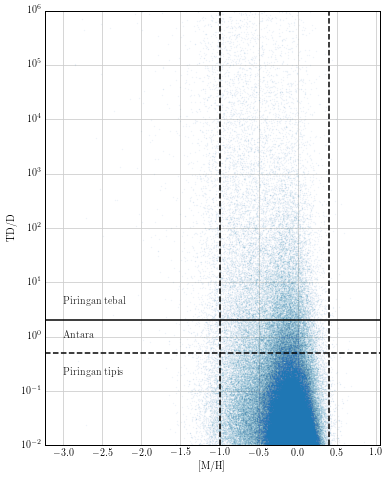

In [19]:
plt.figure(figsize=(6, 8))
gums.viz.scatter("feh", "TD_D", length_check=False, s=0.1, alpha=0.1)
plt.yscale("log")
plt.ylim(1e-2, 1e6)
plt.axvline(0.4, c="k", ls="--")
plt.axvline(-1, c="k", ls="--")
# plt.axvline(-0.3, c="r")
plt.axhline(2, c="k")
plt.axhline(0.5, c="k", ls="--")
plt.xlabel("[M/H]")
plt.ylabel("TD/D")
plt.text(-3, 2E-1, "Piringan tipis")
plt.text(-3, 0.9, "Antara")
plt.text(-3, 4, "Piringan tebal")

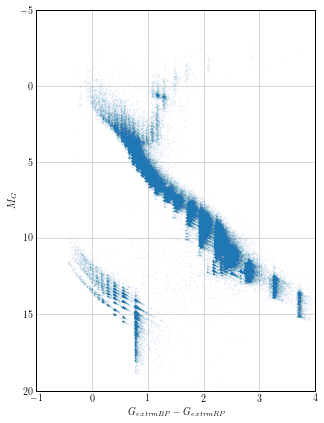

In [21]:
plt.figure(figsize=(5, 7))
gums.viz.scatter("mag_bp - mag_rp", "M_G", length_check=False, s=0.1, alpha=0.1)
plt.xlabel("$G_{\textrm{BP}} - G_{\textrm{RP}}$")
plt.ylabel("$M_G$")
# reverse y-axis
plt.xlim(-1,4)
plt.ylim(-5, 20)
plt.gca().invert_yaxis()
plt.show()

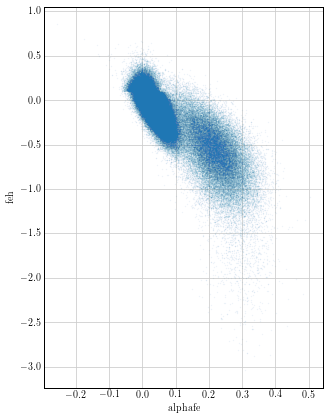

In [22]:
plt.figure(figsize=(5, 7))
gums.viz.scatter("alphafe", "feh", length_check=False, s=0.1, alpha=0.1)
# reverse y-axis
# plt.xlim(-1,4)
# plt.ylim(-5, 20)
plt.show()

In [26]:
gums_thin = gums.filter("population == 1")
gums_thin = gums_thin.extract()
gums_thick = gums.filter("population == 2")
gums_thick = gums_thick.extract()
gums_halo = gums.filter("population == 3")
gums_halo = gums_halo.extract()

In [27]:
len(gums_thin), len(gums_thick), len(gums_halo)

(77688, 17881, 538)

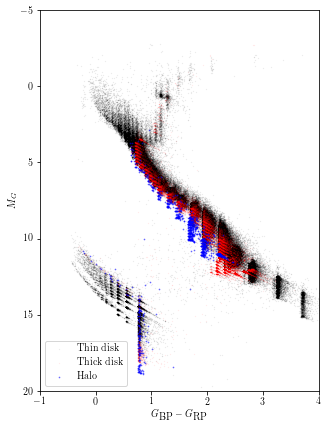

In [22]:
plt.figure(figsize=(5, 7))
gums_thin.viz.scatter("mag_bp - mag_rp", "M_G", length_check=False, s=0.1, alpha=0.1, c="k")
gums_thick.viz.scatter("mag_bp - mag_rp", "M_G", length_check=False, s=0.1, alpha=0.1, c="r")
gums_halo.viz.scatter("mag_bp - mag_rp", "M_G", length_check=False, s=0.5, alpha=0.5, c="b")
plt.xlabel(r"$G_{\textup{BP}} - G_{\textup{RP}}$")
plt.ylabel(r"$M_G$")
# reverse y-axis
plt.xlim(-1,4)
plt.ylim(-5, 20)
plt.legend(["Thin disk", "Thick disk", "Halo"])
plt.gca().invert_yaxis()
plt.show()

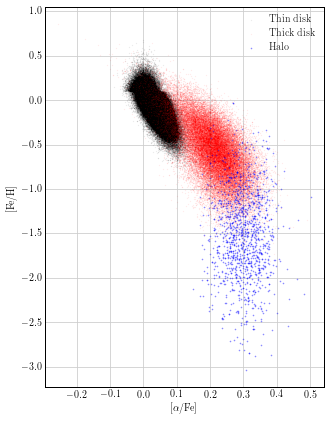

In [27]:
plt.figure(figsize=(5, 7))
gums_thin.viz.scatter("alphafe", "feh", length_check=False, s=0.1, alpha=0.1, c="k")
gums_thick.viz.scatter("alphafe", "feh", length_check=False, s=0.1, alpha=0.1, c="r")
gums_halo.viz.scatter("alphafe", "feh", length_check=False, s=0.4, alpha=0.4, c="b")
plt.xlabel(r"[$\alpha$/Fe]")
plt.ylabel("[Fe/H]")
plt.legend(["Thin disk", "Thick disk", "Halo"])
# reverse y-axis
# plt.xlim(-1,4)
# plt.ylim(-5, 20)
plt.show()

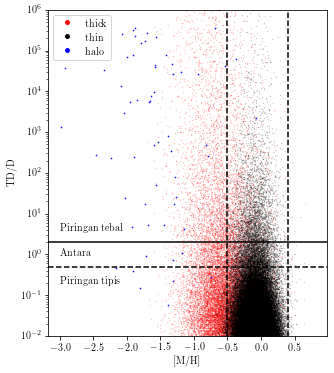

In [30]:
from matplotlib.lines import Line2D

plt.figure(figsize=(5, 6))
gums_thick.viz.scatter("feh", "TD_D", length_check=False, s=0.1, alpha=0.3, c="r")
gums_thin.viz.scatter("feh", "TD_D", length_check=False, s=0.1, alpha=0.3, c="k")
gums_halo.viz.scatter("feh", "TD_D", length_check=False, s=0.5, alpha=0.9, c="b")
plt.yscale("log")
plt.ylim(1e-2, 1e6)
plt.axvline(0.4, c="k", ls="--")
plt.axvline(-0.5, c="k", ls="--")
# plt.axvline(-0.3, c="r")
plt.axhline(2, c="k")
plt.axhline(0.5, c="k", ls="--")
plt.xlabel("[M/H]")
plt.ylabel("TD/D")
plt.text(-3, 2E-1, "Piringan tipis")
plt.text(-3, 0.9, "Antara")
plt.text(-3, 4, "Piringan tebal")
handles = [Line2D([0], [0], marker='o', color='w', label='thick', markerfacecolor='r'), 
           Line2D([0], [0], marker='o', color='w', label='thin', markerfacecolor='k'),
           Line2D([0], [0], marker='o', color='w', label='halo', markerfacecolor='b')]
plt.legend(loc="best", handles=handles)
# plt.savefig("TD_D.pdf", format="pdf", bbox_inches="tight")
plt.show()

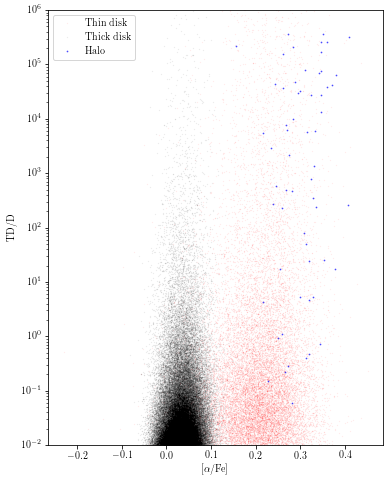

In [31]:
plt.figure(figsize=(6, 8))
gums_thick.viz.scatter("alphafe", "TD_D", length_check=False, s=0.1, alpha=0.1, c="r")
gums_thin.viz.scatter("alphafe", "TD_D", length_check=False, s=0.1, alpha=0.1, c="k")
gums_halo.viz.scatter("alphafe", "TD_D", length_check=False, s=0.6, alpha=0.6, c="b")
plt.yscale("log")
plt.ylim(1e-2, 1e6)
# plt.axvline(0.4, c="k", ls="--")
# plt.axvline(-0.5, c="k", ls="--")
# plt.axvline(-0.3, c="r")
# plt.axhline(2, c="k")
# plt.axhline(-0.5, c="k", ls="--")
plt.xlabel(r"[$\alpha$/Fe]")
plt.ylabel("TD/D")
# plt.text(-3, 2E-1, "Piringan tipis")
# plt.text(-3, 0.9, "Antara")
# plt.text(-3, 4, "Piringan tebal")
plt.legend(["Thin disk", "Thick disk", "Halo"])
plt.show()

In [32]:
gums.export(join(data_dir, "gums-filtered.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :   463.78s =  7.7m =  0.1h 
 

# Defining boundary

In [6]:
gums = vaex.open(join(data_dir, "gums-filtered.hdf5"))
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D
0,5.70230340165197,0.9907624251907357,217.84917,-3.8783402,-0.86863047,-36.90559,16.451735,17.392454,15.436331,0.2031766,-0.0119371675,0.365,1,4.933,3655.948,M1V,1.738901627378478,0.043459976982218144,9.464739669006407,217.64346580819304,9.760955,-3.530402610568098,1.8254586681721447,1.8849778410812221,-3.645511567610364,0.27978673940394216,-36.9526377722172,2.588595224847787,37.04168419060032,37.04168419060032,2.588595224847787,7.529786739403942,1.9690567558195974e-06,2.6385098101705457e-07,2.232190042678473e-09,0.13399866724879123,118.20274079372369,0.014188094179283777
1,2.262153811562917,-0.15237202902940128,201.00012,-23.340887,46.24721,-18.927752,13.732431,14.450747,12.877853,-0.635972,0.19272278,1.117,2,nan,nan,,4.082050359151674,0.33287666285298056,65.6794287669635,189.9664752242508,7.2164497,-51.520979012657314,5.402804666238776,5.1474712438468675,-49.08612735524185,-1.3199839772253767,-19.570740428229563,51.18849969898512,13.122472259873968,13.122472259873968,51.18849969898512,5.930016022774623,2.0649003847282828e-08,2.6170988619300453e-08,5.201798196204342e-10,1.2674213639000438,50.31142622640945,0.1341975561776517
2,1.3007427818629962,0.06744827801120289,273.87805,-18.815025,-43.058407,-16.637304,23.439735,23.755043,22.930504,-0.076349415,-0.0013227072,0.9,1,8.49,4623.8096,DAVII,3.4119703649571616,-0.4013740895693589,-106.9996617374023,252.11160152348504,16.25195,26.762400252332597,-38.62389816694515,-50.1408480311491,34.74246535657558,-39.655983735109224,-34.90426177209589,24.356638498062743,-42.80304369998163,-42.80304369998163,24.356638498062743,-32.405983735109224,4.9786004403517815e-08,6.817770348399093e-08,1.110974064768194e-09,1.3694150454695573,61.367502308180605,0.1449968871673649
3,1.3916098340983458,0.25917187811922676,246.86795,4.8797855,-18.785496,22.480766,16.966093,17.99954,15.919754,-0.15922353,0.04377048,0.365,1,4.933,3655.948,M1V,3.292408144437345,-0.22285477661223535,-54.56144582163554,240.76302370594414,10.00377,18.418804081578667,-6.120033821354551,-7.161382576904199,21.552838838402856,-11.952864801554641,20.34205684588705,-23.34934548799027,-18.251909598667623,-18.251909598667623,-23.34934548799027,-4.702864801554641,4.343658507388384e-06,5.69660772440532e-07,4.466731619710906e-09,0.13114768839943622,127.53413926341995,0.01388622583052854
4,2.2905078882200445,0.29265051083784155,286.79288,-5.980567,-5.0217767,-10.385479,26.776007,30.978853,25.173044,-0.06978296,0.02688925,0.073,1,5.36,1599.558,L5V,3.657965332299921,0.566341095598644,153.87814703868327,242.0158471568076,19.488165,2.430451904400381,-7.421477340097668,-10.08874321885516,3.303952036179129,-14.08589375326195,-3.3508969567132665,1.2827359820812134,-4.52760398800034,-4.52760398800034,1.2827359820812134,-6.835893753261949,3.6839335233890733e-06,3.2161249285079046e-07,2.376851090914815e-09,0.08730138337429055,135.3103246897165,0.009243675886689588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"96,116",1.500379287362948,-0.4771914331042114,294.7154,1.579163,3.493099,15.738678,7.2042236,7.2237525,7.157543,0.068830065,0.066220276,2.814,1,3.651,9015.711,A4III,4.046280742655593,-0.4546725413102364,-129.42961302708514,264.7737490423575,-0.14278984,-2.8078684700617265,2.6098602908828155,3.645846846995929,-3.92245456360847,-3.63647942190223,15.740844995019945,-6.6427925641954975,14.79976884650184,14.79976884650184,-6.6427925641954975,3.61352057809777,4.631209091113514e-06,4.045370542972634e-07,2.934732785898241e-09,0.08735020301145542,137.84459567873256,0.009248845024742339
"96,117",5.140165571005945,0.4895635987826919,215.46207,1.1883273,-26.035639,-32.978035,15.834999,16.81037,14.823276,-0.55685514,0.2440937,0.433,2

In [7]:
gums_thin = gums.filter("population == 1")
gums_thin = gums_thin.extract()
gums_thick = gums.filter("population == 2")
gums_thick = gums_thick.extract()
gums_halo = gums.filter("population == 3")
gums_halo = gums_halo.extract()

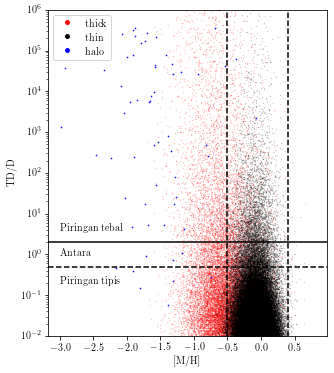

In [12]:
from matplotlib.lines import Line2D

plt.figure(figsize=(5, 6))
gums_thick.viz.scatter("feh", "TD_D", length_check=False, s=0.1, alpha=0.3, c="r")
gums_thin.viz.scatter("feh", "TD_D", length_check=False, s=0.1, alpha=0.3, c="k")
gums_halo.viz.scatter("feh", "TD_D", length_check=False, s=0.5, alpha=0.9, c="b")
plt.yscale("log")
plt.ylim(1e-2, 1e6)
plt.axvline(0.4, c="k", ls="--")
plt.axvline(-0.5, c="k", ls="--")
# plt.axvline(-0.3, c="r")
plt.axhline(2, c="k")
plt.axhline(0.5, c="k", ls="--")
plt.xlabel("[M/H]")
plt.ylabel("TD/D")
plt.text(-3, 2E-1, "Piringan tipis")
plt.text(-3, 0.9, "Antara")
plt.text(-3, 4, "Piringan tebal")
handles = [Line2D([0], [0], marker='o', color='w', label='thick', markerfacecolor='r'), 
           Line2D([0], [0], marker='o', color='w', label='thin', markerfacecolor='k'),
           Line2D([0], [0], marker='o', color='w', label='halo', markerfacecolor='b')]
plt.legend(loc="best", handles=handles)
# plt.savefig("TD_D.pdf", format="pdf", bbox_inches="tight")
plt.show()

See the contamination percentage for given boundary

In [13]:
fe_b = -0.5
TD_D = 0.5

gums_guess_thin = gums_thin.filter(f"feh > {fe_b} and TD_D < {TD_D}")
gums_guess_thin = gums_guess_thin.extract()
gums_guess_thick = gums_thick.filter(f"feh > {fe_b} and TD_D < {TD_D}")
gums_guess_thick = gums_guess_thick.extract()
gums_guess_halo = gums_halo.filter(f"feh > {fe_b} and TD_D < {TD_D}")
gums_guess_halo = gums_guess_halo.extract()
gums_guess = gums_guess_thin.concat(gums_guess_thick).concat(gums_guess_halo)
gums_guess

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D
0,5.70230340165197,0.9907624251907357,217.84917,-3.8783402,-0.86863047,-36.90559,16.451735,17.392454,15.436331,0.2031766,-0.0119371675,0.365,1,4.933,3655.948,M1V,1.738901627378478,0.043459976982218144,9.464739669006407,217.64346580819304,9.760955,-3.530402610568098,1.8254586681721447,1.8849778410812221,-3.645511567610364,0.27978673940394216,-36.9526377722172,2.588595224847787,37.04168419060032,37.04168419060032,2.588595224847787,7.529786739403942,1.9690567558195974e-06,2.6385098101705457e-07,2.232190042678473e-09,0.13399866724879123,118.20274079372369,0.014188094179283777
1,1.3007427818629962,0.06744827801120289,273.87805,-18.815025,-43.058407,-16.637304,23.439735,23.755043,22.930504,-0.076349415,-0.0013227072,0.9,1,8.49,4623.8096,DAVII,3.4119703649571616,-0.4013740895693589,-106.9996617374023,252.11160152348504,16.25195,26.762400252332597,-38.62389816694515,-50.1408480311491,34.74246535657558,-39.655983735109224,-34.90426177209589,24.356638498062743,-42.80304369998163,-42.80304369998163,24.356638498062743,-32.405983735109224,4.9786004403517815e-08,6.817770348399093e-08,1.110974064768194e-09,1.3694150454695573,61.367502308180605,0.1449968871673649
2,1.3916098340983458,0.25917187811922676,246.86795,4.8797855,-18.785496,22.480766,16.966093,17.99954,15.919754,-0.15922353,0.04377048,0.365,1,4.933,3655.948,M1V,3.292408144437345,-0.22285477661223535,-54.56144582163554,240.76302370594414,10.00377,18.418804081578667,-6.120033821354551,-7.161382576904199,21.552838838402856,-11.952864801554641,20.34205684588705,-23.34934548799027,-18.251909598667623,-18.251909598667623,-23.34934548799027,-4.702864801554641,4.343658507388384e-06,5.69660772440532e-07,4.466731619710906e-09,0.13114768839943622,127.53413926341995,0.01388622583052854
3,2.2905078882200445,0.29265051083784155,286.79288,-5.980567,-5.0217767,-10.385479,26.776007,30.978853,25.173044,-0.06978296,0.02688925,0.073,1,5.36,1599.558,L5V,3.657965332299921,0.566341095598644,153.87814703868327,242.0158471568076,19.488165,2.430451904400381,-7.421477340097668,-10.08874321885516,3.303952036179129,-14.08589375326195,-3.3508969567132665,1.2827359820812134,-4.52760398800034,-4.52760398800034,1.2827359820812134,-6.835893753261949,3.6839335233890733e-06,3.2161249285079046e-07,2.376851090914815e-09,0.08730138337429055,135.3103246897165,0.009243675886689588
4,0.11835785069471962,0.7656086181591222,42.073467,-104.90564,-167.39822,-7.493768,22.594732,26.783258,20.99088,-0.042068627,0.010689837,0.073,1,5.36,1599.558,L5V,2.064845291941395,-0.3278979214738871,-13.549914060798121,39.83185252749535,19.47469,-121.04719946939295,-156.124738871914,-31.13568107980515,-24.140229316089382,-27.063420633134665,-17.121870867407885,-13.13444476152451,26.521604292350673,26.521604292350673,-13.13444476152451,-19.813420633134665,1.9676380224363517e-06,3.8615242565809977e-07,3.360604155137383e-09,0.1962517603618787,114.9056561951176,0.020779598155963627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"82,802",0.27735435227602157,-0.8046101571733935,94.19075,-50.83221,-205.89381,53.35797,12.382387,13.0623,11.552869,-1.912818,0.31236097,1.469,3,nan,nan,,5.174985094022173,-1.237017001561721,-88.99244985806934,30.85840690666488,7.5123453,79.8870188335984,196.45416903084129,87.70974468625272,35.66669040523529,-21.67806904526407,100.35005592952771,12.86549461674467,105.72003394716045,105.72003394716045,12.86549461674467,-14.42806904526407,1.4934361702469483e-08,5.677590000798707e-08,1.3678044458323075e-09,3.8016957898240036,41.50878452031862,0.4025324953931298
"82,803",3.4904596797111633,1.4551406370750073,229.56345,15.658209,-51.945614,-47.04535,17.093828,18.015621,16.11794,-1.7983878,0.22832583,0.206

In [14]:
thin_captured = len(gums_guess_thin) / len(gums_thin)
thick_captured = len(gums_guess_thick) / len(gums_thick)
halo_captured = len(gums_guess_halo) / len(gums_halo)

thin_percent = len(gums_guess_thin) / len(gums_guess)
thick_percent = len(gums_guess_thick) / len(gums_guess)
halo_percent = len(gums_guess_halo) / len(gums_guess)

print(f"Thin disk captured: {thin_captured:.2f}")
print(f"Thick disk captured: {thick_captured:.2f}")
print(f"Halo captured: {halo_captured:.2f}")
print(f"Thin disk percent: {thin_percent:.2f}")
print(f"Thick disk percent: {thick_percent:.2f}")
print(f"Halo percent: {halo_percent:.2f}")

Thin disk captured: 0.92
Thick disk captured: 0.63
Halo captured: 0.01
Thin disk percent: 0.86
Thick disk percent: 0.14
Halo percent: 0.00
